# Gráficos - Parte 2 (Pyplot)
```
(*) Caderno produzido por Edson Pimentel
```

O objetivo deste caderno (notebook) é mostrar a criação de gráficos utilizando a biblioteca `pyplot` do Matplotlib. Esta biblioteca disponibiliza mais opções o que possibilita a construção de gráficos mais elaborados.

## A Base de Dados

*Para* mostrar instruções (funções) utilizadas para a construção de gráficos em Python vamos utilizar inicialmente a base de dados Milsa, um conjunto de dados hipotético de atributos de 36 funcionários da companhia “Milsa”.

Mais informações [nesta página](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/aed.html#o_conjunto_de_dados_milsa) do material elaborado pelo Prof. André Zibetti da UFSC.

In [ ]:
import pandas as pd 
#https://drive.google.com/file/d/1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc/view?usp=sharing
codigo = "1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
milsa = pd.read_csv(file, sep = ";",decimal=",", index_col = "Funcionario")
print(milsa)

             EstCivil Instrucao  Filhos  Salario  Anos  Meses    Regiao
Funcionario                                                            
1            solteiro   1o Grau     NaN     4.00    26      3  interior
2              casado   1o Grau     1.0     4.56    32     10   capital
3              casado   1o Grau     2.0     5.25    36      5   capital
4            solteiro   2o Grau     NaN     5.73    20     10     outro
5            solteiro   1o Grau     NaN     6.26    40      7     outro
6              casado   1o Grau     0.0     6.66    28      0  interior
7            solteiro   1o Grau     NaN     6.86    41      0  interior
8            solteiro   1o Grau     NaN     7.39    43      4   capital
9              casado   2o Grau     1.0     7.59    34     10   capital
10           solteiro   2o Grau     NaN     7.44    23      6     outro
11             casado   2o Grau     2.0     8.12    33      6  interior
12           solteiro   1o Grau     NaN     8.46    27     11   

In [ ]:
milsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EstCivil   36 non-null     object 
 1   Instrucao  36 non-null     object 
 2   Filhos     20 non-null     float64
 3   Salario    36 non-null     float64
 4   Anos       36 non-null     int64  
 5   Meses      36 non-null     int64  
 6   Regiao     36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ KB


**Observação:**  Note o parâmetro index_col='Funcionario' utilizado na abertura do arquivo. Escolhemos a coluna "Funcionario" como a primeira a ser exibida. Assim, a numeração das linhas desapareceu.

A seguir a classificação de todas as variáveis desse conjunto de dados. 

* Funcionario	- Quantitativa discreta
* EstCivil - Qualitativa nominal
* Instrucao -	Qualitativa ordinal
* Filhos - Quantitativa discreta
* Salario -	Quantitativa contínua
* Anos (na empresa)	- Quantitativa discreta
* Meses (na empresa) - Quantitativa discreta
* Regiao - Qualitativa nominal

## Biblioteca Gráfica Matplotlib


O Pandas facilita o trabalho de criar os gráficos importando a biblioteca `pyplot` de `Matplotlib`. 

`Pyplot` possui funções para todos os tipos de gráficos que também estão no Pandas via função `plot()`, mas amplias as possibilidades.

In [ ]:
# Importando pyplot para customizações
import matplotlib.pyplot as plt
 

## Gráfico de Barras

Objetivo: Exibir graficamente a relação entre `Salario` (**contínua**) e `Anos de Empresa`(**contínua ou discreta**)

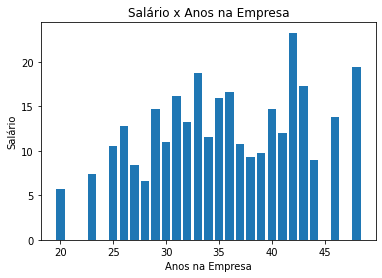

In [ ]:
# construir o gráfico
plt.bar(milsa.Anos, milsa.Salario)
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
# mostrar o gráfico
plt.show()

## Gráfico de Barras Verticais

Objetivo: Exibir graficamente a relação entre `Salario` (**contínua**) e `Anos de Empresa`(**contínua ou discreta**)

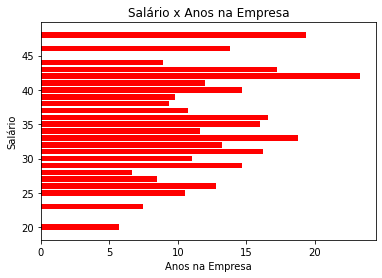

In [ ]:
# construir o gráfico
plt.barh(milsa.Anos, milsa.Salario, color = "red")
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
# mostrar o gráfico
plt.show()

## Gráfico de Setor

Objetivo: Exibir graficamente a *quantidade* de funcionários por nível de `Instrução` (**nominal ou ordinal**)

In [ ]:
# Quantos funcionarios existem por nível de instrução?
QInstrucao = milsa.groupby("Instrucao")["Instrucao"].count()
QInstrucao


Instrucao
1o Grau     12
2o Grau     18
Superior     6
Name: Instrucao, dtype: int64

Gráfico de Pizza usando matplotlib.pyplot

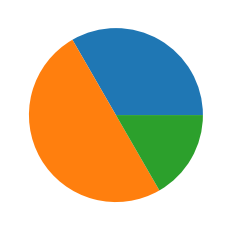

In [ ]:
# construir o gráfico 
plt.pie(QInstrucao)
# mostrar o gráfico
plt.show()

Note que o gráfico não apresentou o significado de cada fatia da Pizza.

A função pie do matplotlib.pyplot requer o parâmetro labels para mostrar o significado de cada "fatia".

In [ ]:
# Obtendo os níveis de Instrução que constam na tabela (unique = 1 valor de cada)
Rotulos = milsa["Instrucao"].unique()
Rotulos

array(['1o Grau', '2o Grau', 'Superior'], dtype=object)

Nota abaixo, o segundo paramêtro `labels = Rotulos`.

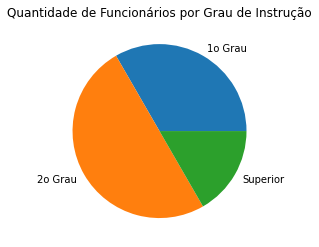

In [ ]:
# construir o gráfico 
plt.pie(QInstrucao, labels = Rotulos)
plt.title('Quantidade de Funcionários por Grau de Instrução')
# mostrar o gráfico
plt.show()

## Gráfico de Barras (Nominal)

Objetivo: Exibir graficamente a média dos funcionários por nível de `Instrução` (**nominal ou ordinal**)

In [ ]:
# Qual a média dos salário por nível de instrução?
MSalario = milsa.groupby("Instrucao")["Salario"].mean()
MSalario

Instrucao
1o Grau      7.836667
2o Grau     11.528333
Superior    16.475000
Name: Salario, dtype: float64

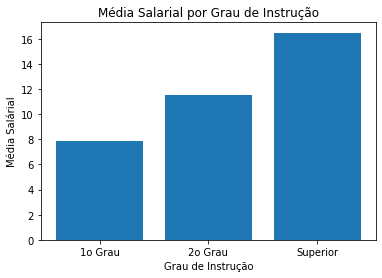

In [ ]:
# construir o gráfico 
plt.bar(Rotulos, MSalario)
plt.ylabel('Média Salárial')
plt.xlabel('Grau de Instrução')
plt.title('Média Salarial por Grau de Instrução')
# mostrar o gráfico
plt.show()

## Gráfico de Linha

Objetivo: Analisar a relação entre Salário e Tempo na Empresa (em Anos)

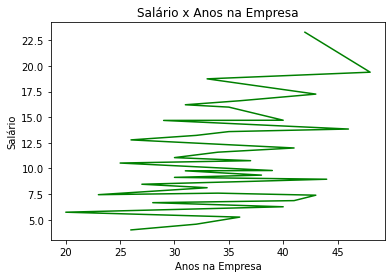

In [ ]:
import pandas as pd 
#https://drive.google.com/file/d/1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc/view?usp=sharing
codigo = "1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
milsa = pd.read_csv(file, sep = ";",decimal=",", index_col = "Funcionario")
plt.plot(milsa.Anos, milsa.Salario, color='green')
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
plt.show()

## Gráfico de Dispersão
Objetivo: Analisar a relação entre Salário e Tempo na Empresa (em Anos)

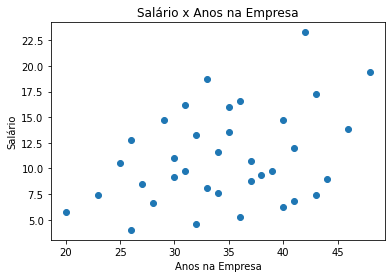

0.36336218090815775


In [ ]:
import pandas as pd 
#https://drive.google.com/file/d/1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc/view?usp=sharing
codigo = "1_c1rtxf2YDaBKeQA62Gg4yjljuVO6mgc"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
milsa = pd.read_csv(file, sep = ";",decimal=",", index_col = "Funcionario")
plt.scatter(milsa.Anos, milsa.Salario)
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
plt.show()
print( milsa['Salario'].corr(milsa['Anos']))

### Dois gráficos na mesma imagem

Vamos traçar um gráfico de linhas ligando os pontos.

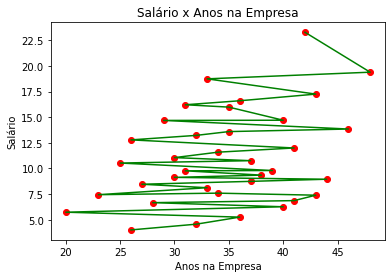

In [ ]:
# gráfico de dispersão (em vermelho) 
plt.scatter(milsa.Anos, milsa.Salario, color = "red")
# gráfico de linhas (em verde)
plt.plot(milsa.Anos, milsa.Salario, color='green')
# outras informações
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
plt.show()

Veja que podemos também mudar a linha contínua para tracejada e trocar os "pontos" por "*"

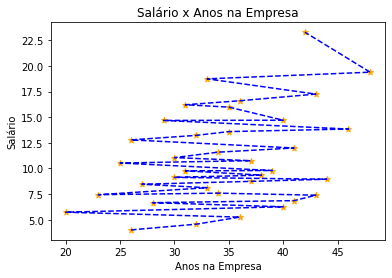

In [ ]:
# gráfico de dispersão (em vermelho) 
plt.scatter(milsa.Anos, milsa.Salario, color = "orange", marker="*")
# gráfico de linhas (em verde)
plt.plot(milsa.Anos, milsa.Salario, 'b--', color='blue')
# outras informações
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
plt.show()

Podemos também aumentar o tamanho da figura usando o `figure(figsize)`. Isto vale para os outros tipos de gráficos também.

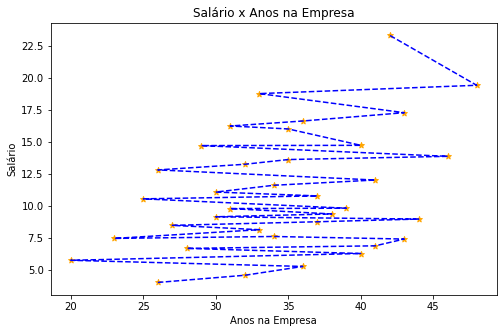

In [ ]:
# configurando o tamanho da imagem : Isto deve vir antes de construir a figura
plt.figure(figsize=(8, 5))
# gráfico de dispersão (em vermelho) 
plt.scatter(milsa.Anos, milsa.Salario, color = "orange", marker="*")
# gráfico de linhas (em verde)
plt.plot(milsa.Anos, milsa.Salario, 'b--', color='blue')
# outras informações
plt.ylabel('Salário')
plt.xlabel('Anos na Empresa')
plt.title('Salário x Anos na Empresa')
plt.show()

## Gráfico de Histograma

Objetivo: Exibir graficamente a distribuição (frequência) dos funcinários considerando os Anos de Empresa e o Grau de Instrução.



Gostaríamos de analisar o tempo de empresa para **cada grau de instrução**. Vamos construir primeiro o histograma para "1o Grau".

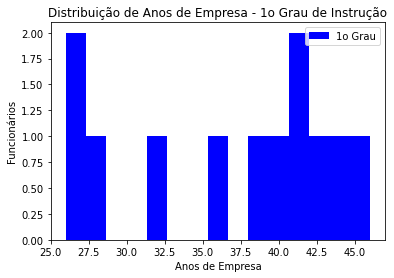

In [ ]:
# obter os dados dos funcionários com 1o Grau
grau1 = milsa[["Anos","Instrucao"]].query("Instrucao =='1o Grau'")
# construir e mostrar o gráfico
plt.hist(grau1.Anos, bins=15, color = "blue", label='1o Grau')
plt.title('Distribuição de Anos de Empresa - 1o Grau de Instrução')
plt.xlabel('Anos de Empresa')
plt.ylabel('Funcionários')
plt.legend(loc='upper right')
plt.show()

Agora vamos construir o histograma para os outros 2 níveis de instrução e juntar na mesma figura.

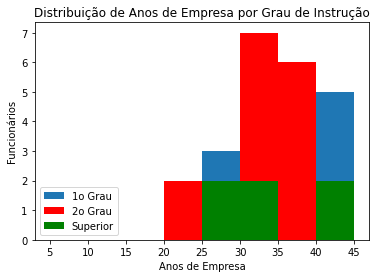

In [ ]:
# obtendo os dados
grau1 = milsa[["Anos","Instrucao"]].query("Instrucao =='1o Grau'")
grau2 = milsa[["Anos","Instrucao"]].query("Instrucao =='2o Grau'")
grau3 = milsa[["Anos","Instrucao"]].query("Instrucao =='Superior'")
# construindo os gráficos
plt.hist(grau1.Anos, bins=range(5,50,5), label='1o Grau')
plt.hist(grau2.Anos, bins=range(5,50,5), color="red", label='2o Grau')
plt.hist(grau3.Anos, bins=range(5,50,5), color="green", label='Superior')
# outras configurações
plt.title('Distribuição de Anos de Empresa por Grau de Instrução')
plt.xlabel('Anos de Empresa')
plt.ylabel('Funcionários')
plt.legend(loc='lower left')

Podemos plotar os gráficos com "transparência" para que seja possível visualizar as sobreposições. Isto pode ser feito usando o parâmetro `"alpha"`. Para tal, deve-se usar valores menores que 1. No exemplo abaixo, usamos `0.3`. 

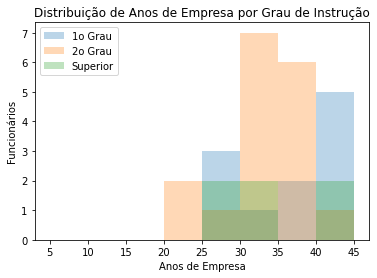

In [ ]:
# construindo os gráficos
plt.hist(grau1.Anos, bins=range(5,50,5), alpha = 0.3, label='1o Grau')
plt.hist(grau2.Anos, bins=range(5,50,5), alpha = 0.3, label='2o Grau')
plt.hist(grau3.Anos, bins=range(5,50,5), alpha = 0.3, label='Superior')
# outras configurações
plt.title('Distribuição de Anos de Empresa por Grau de Instrução')
plt.xlabel('Anos de Empresa')
plt.ylabel('Funcionários')
plt.legend(loc='upper left')

## Gráfico de Caixa (Boxplot)

Objetivo: Construir um gráfico do tipo box para a variável "Salário"

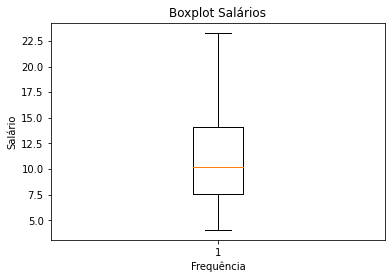

In [ ]:
plt.boxplot(milsa.Salario)
plt.xlabel('Frequência')
plt.ylabel('Salário')
plt.title('Boxplot Salários')
plt.show()

Vide abaixo como exibir o valor da mediana no gráfico

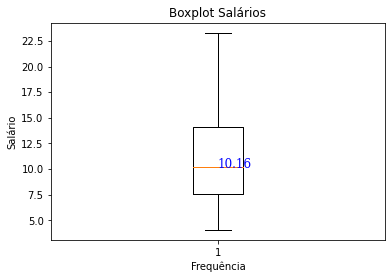

In [ ]:
plt.boxplot(milsa.Salario)
plt.xlabel('Frequência')
plt.ylabel('Salário')
plt.title('Boxplot Salários')
# exibir mediana no gráfico
mediana = milsa.Salario.median()
s_mediana = "{0:.2f}".format(mediana)
font_1 = {'family': 'serif', 'color': 'blue', 'size':'12'}
plt.text(1, mediana, s_mediana, fontdict=font_1)
plt.show()

### Outros parâmetros
* O parâmetro `labels` exibe um rótulo no eixo x (no lugar de "1").
* O parâmetro `showmeans` exibe uma "marca" na média

Note que a média é um pouco maior que a mediana. Veja cálculos a seguir:

In [ ]:
print("média: ", milsa.Salario.mean())
print("mediana: ", milsa.Salario.median())

média:  11.12222222222222
mediana:  10.165


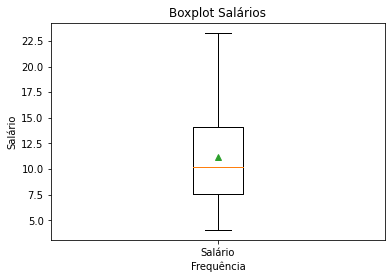

In [ ]:
plt.boxplot(milsa.Salario, showmeans=True, labels =['Salário'])
plt.xlabel('Frequência')
plt.ylabel('Salário')
plt.title('Boxplot Salários')
plt.show()